In [1]:
import numpy as np, pandas as pd, matplotlib.pyplot as plt 

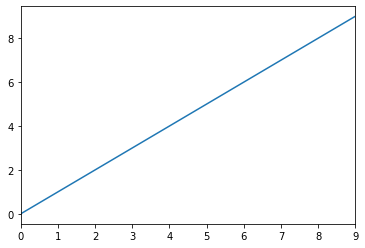

In [2]:
data = pd.Series([0,1,2,3,4,5,6,7,8,9])
data.plot() 

In [3]:
properties = pd.read_csv('fy19fullpropassess.csv')
properties

/opt/conda/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (15,60) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,PID,CM_ID,GIS_ID,ST_NUM,ST_NAME,ST_NAME_SUF,UNIT_NUM,ZIPCODE,PTYPE,LU,...,U_BTH_STYLE2,U_BTH_STYLE3,U_KITCH_TYPE,U_KITCH_STYLE,U_HEAT_TYP,U_AC,U_FPLACE,U_INT_FIN,U_INT_CND,U_VIEW
0,502550008,502550000.0,502550000,87,BEACON,ST,2-F,2108.0,102,CD,...,M,NaN,O,M,W,N,1.0,N,G,A
1,502550010,502550000.0,502550000,87,BEACON,ST,2-R,2108.0,102,CD,...,NaN,NaN,O,S,W,N,1.0,N,A,A
2,502550012,502550000.0,502550000,87,BEACON,ST,3-F,2108.0,102,CD,...,S,NaN,O,M,W,N,1.0,N,A,G
3,502550014,502550000.0,502550000,87,BEACON,ST,3-R,2108.0,102,CD,...,NaN,NaN,O,N,W,N,1.0,S,A,G
4,502550016,502550000.0,502550000,87,BEACON,ST,4,2108.0,102,CD,...,M,M,O,L,W,C,2.0,N,E,G
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
174663,2205668000,NaN,2205668000,4,LAKE,ST,NaN,2135.0,105,R3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
174664,2205669000,NaN,2205669000,2193 2201,COMMONWEALTH,AV,NaN,2135.0,319,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
174665,2205670000,NaN,2205670000,2203,COMMONWEALTH,AV,NaN,2135.0,985,E,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
174666,2205670000,NaN,2205670000,2203,COMMONWEALTH,AV,NaN,2135.0,985,E,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
properties.columns

Index(['PID', 'CM_ID', 'GIS_ID', 'ST_NUM', 'ST_NAME', 'ST_NAME_SUF',
       'UNIT_NUM', 'ZIPCODE', 'PTYPE', 'LU', 'OWN_OCC', 'OWNER',
       'MAIL_ADDRESSEE', 'MAIL_ADDRESS', 'MAIL CS', 'MAIL_ZIPCODE', 'AV_LAND',
       'AV_BLDG', 'AV_TOTAL', 'GROSS_TAX', 'LAND_SF', 'YR_BUILT', 'YR_REMOD',
       'GROSS_AREA', 'LIVING_AREA', 'NUM_FLOORS', 'STRUCTURE_CLASS',
       'R_BLDG_STYL', 'R_ROOF_TYP', 'R_EXT_FIN', 'R_TOTAL_RMS', 'R_BDRMS',
       'R_FULL_BTH', 'R_HALF_BTH', 'R_BTH_STYLE', 'R_BTH_STYLE2',
       'R_BTH_STYLE3', 'R_KITCH', 'R_KITCH_STYLE', 'R_KITCH_STYLE2',
       'R_KITCH_STYLE3', 'R_HEAT_TYP', 'R_AC', 'R_FPLACE', 'R_EXT_CND',
       'R_OVRALL_CND', 'R_INT_CND', 'R_INT_FIN', 'R_VIEW', 'S_NUM_BLDG',
       'S_BLDG_STYL', 'S_UNIT_RES', 'S_UNIT_COM', 'S_UNIT_RC', 'S_EXT_FIN',
       'S_EXT_CND', 'U_BASE_FLOOR', 'U_NUM_PARK', 'U_CORNER', 'U_ORIENT',
       'U_TOT_RMS', 'U_BDRMS', 'U_FULL_BTH', 'U_HALF_BTH', 'U_BTH_STYLE',
       'U_BTH_STYLE2', 'U_BTH_STYLE3', 'U_KITCH_TYPE', 'U_KIT

In [6]:
properties.groupby('LU').count()

,PID,CM_ID,GIS_ID,ST_NUM,ST_NAME,ST_NAME_SUF,UNIT_NUM,ZIPCODE,PTYPE,OWN_OCC,...,U_BTH_STYLE2,U_BTH_STYLE3,U_KITCH_TYPE,U_KITCH_STYLE,U_HEAT_TYP,U_AC,U_FPLACE,U_INT_FIN,U_INT_CND,U_VIEW
LU,,,,,,,,,,,,,,,,,,,,,
A,2904,1,2904,2904,2904,2901,0,2904,2904,2904,...,0,0,0,0,0,0,0,0,0,0
AH,3,0,3,3,3,3,0,3,3,3,...,0,0,0,0,0,0,0,0,0,0
C,4392,106,4392,4392,4392,4386,0,4391,4392,4392,...,0,0,0,0,0,0,0,0,0,0
CC,1803,1803,1803,1803,1803,1787,1793,1802,1803,1803,...,0,0,0,0,0,0,0,0,0,0
CD,63910,63874,63910,63910,63910,63594,63907,63910,63910,63910,...,25436,6929,63860,63860,63860,63860,63860,63860,63860,63860
CL,1989,0,1989,1989,1989,1989,0,1989,1989,1989,...,0,0,0,0,0,0,0,0,0,0
CM,9927,9927,9927,9927,9927,9918,0,9927,9927,9927,...,0,0,0,0,0,0,0,0,0,0
CP,6028,6024,6028,6028,6028,5918,0,6024,6028,6028,...,0,0,0,0,0,0,0,0,0,0
E,8704,271,8704,8704,8704,8697,0,8703,8704,8704,...,33,1,184,184,184,184,184,184,184,184


In [ ]:
newprops = properties[properties['YR_REMOD'] > 1800]
newprops.shape
#properties.plot.scatter(x='YR_REMOD', y='GROSS_TAX')

In [ ]:
newprops.plot.hist(y='YR_REMOD', bins=100);

In [ ]:
properties.plot.hist(y='LU');

In [ ]:
properties['YR_REMOD'].describe()